In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
data = pd.read_csv("ADANIPORTS.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [214]:
data.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [215]:
data.drop(columns=['Date', 'Symbol', 'Series', 'Trades'], inplace=True)

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Prev Close          3322 non-null   float64
 1   Open                3322 non-null   float64
 2   High                3322 non-null   float64
 3   Low                 3322 non-null   float64
 4   Last                3322 non-null   float64
 5   Close               3322 non-null   float64
 6   VWAP                3322 non-null   float64
 7   Volume              3322 non-null   int64  
 8   Turnover            3322 non-null   float64
 9   Deliverable Volume  3322 non-null   int64  
 10  %Deliverble         3322 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 285.6 KB


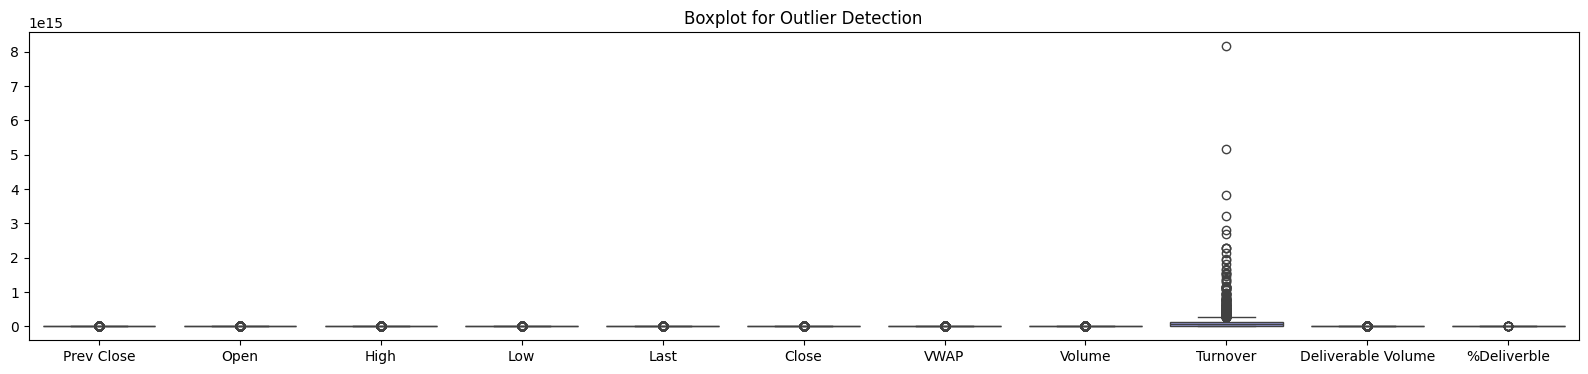

In [217]:
plt.figure(figsize=(20, 4))
plt.title("Boxplot for Outlier Detection")
sns.boxplot(data)
plt.show()

In [218]:
columns = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP',
       'Volume', 'Turnover', 'Deliverable Volume', '%Deliverble']

In [219]:
from scipy.stats.mstats import winsorize

for col in columns:
        data[col] = winsorize(data[col], limits=(0.05, 0.05))

data['Volume'] = np.log1p(data['Volume'])
data['Turnover'] = np.log1p(data['Turnover'])
data['Deliverable Volume'] = np.log1p(data['Deliverable Volume'])

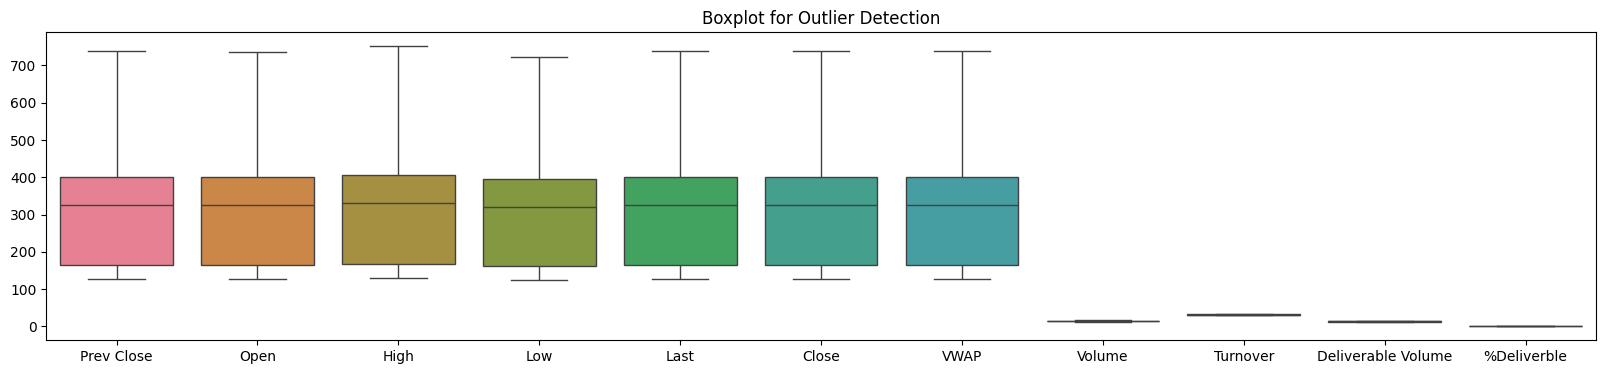

In [220]:
plt.figure(figsize=(20, 4))
plt.title("Boxplot for Outlier Detection")
sns.boxplot(data)
plt.show()

In [221]:
X = data.drop(columns=['Close'])
y = data['Close']

In [222]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [224]:
y_pred = model.predict(X_test)

In [225]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.7356229982195521
Mean Squared Error (MSE): 1.344042863955077
R² Score: 0.9999577860064021


In [228]:
y_test_series = pd.Series(y_test)  
y_pred_series = pd.Series(y_pred)

y_test_class = (y_test_series.diff() > 0).astype(int)  
y_pred_class = (y_pred_series.diff() > 0).astype(int)  

In [229]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_class[1:], y_pred_class[1:])  # Remove NaN from diff()
print("Classification Accuracy:", accuracy)

Classification Accuracy: 0.9969879518072289


In [230]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_class[1:], y_pred_class[1:])
print(conf_matrix)

[[325   2]
 [  0 337]]
